# Instacart Customer Segments

**Background**

Instacart is a grocery ordering and delivery app that aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart has:
- 100s of retailers
- 10,000s of stores
- 10,000s of shoppers
- 1,00,000s of products
- 100,000,000s of items

Instacart's data science team uses transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session.

(https://tech.instacart.com/predicting-real-time-availability-of-200-million-grocery-items-in-us-canada-stores-61f43a16eafe)

(https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

**Data**

The dataset is a relational set of files describing customers' orders over time. The goal is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200K Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders.

(https://www.kaggle.com/c/instacart-market-basket-analysis)

**Possible problem**

Because Instacart does not have the logistics supply chain information for products, when an item that a customer adds to the cart is unavailable in store, it costs every stakeholder in Instacart's marketplace. Shoppers waste time searching for an unavailable item, customers can't buy what they want, and retail partners lose out on revenue.

By proactively and accurately predicting customers' buying behavior, Instacart can use this information to match and search through their availability prediction model of whether a certain item out of the 200 million grocery items is available in real-time and make appropriate recommendations to the customer for the out-of-stock item(s) if applicable.

**Possible prediction tasks**
- Products that a user will buy again
- Products that a user will try for the first time
- Products that a user will add to cart next during a session
- Products that a user will buy together
- Time that a user will make the next purchase

In [2]:
import pandas as pd
import numpy as np
import scipy as sc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import pickle

## Customer Segments using Principal Component Analysis (PCA)

**Customer segmentation: which customers have similar buying patterns?**

**When there are too many features, it is better to perform dimensionality reduction to minimize the noise by removing irrelevant or highly correlated variables that do not add a significant amount of variance. Principal Compeonent Analysis (PCA) remaps the data to a smaller coordinate system while maintaining the the most important information possible.**

(https://www.kaggle.com/asindico/customer-segments-with-pca)

In [3]:
mba = pd.read_pickle('mba.pickle')

**Since there are so many transactions and products, we will use the 134 aisles instead to cluster users using Principal Component Analysis. Let's first create a dataframe with all the purchases as aisles made by each user.**

In [5]:
data = pd.crosstab(mba['user_id'], mba['aisle'])

**Approach:**
1. Standardize the data
2. Use the standardized data to create a covariance matrix.
3. Use the resulting matrix to calculate eigenvectors (principal components) and their respective eigenvalues.
4. Sort the componments in descending order by its eigenvalue.
5. Choose *n* components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).
6. Create a new matrix using the *n* components.

(https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

### Step 1: Standardize the Data

In [6]:
from sklearn.preprocessing import StandardScaler

data_std = StandardScaler().fit_transform(data)

### Step 2: Use the Standardized Data to Create a Covariance Matrix

In [7]:
cov_matrix = np.cov(data_std.T)
cov_matrix

array([[ 1.00000485,  0.03629408,  0.01898096, ...,  0.05411654,
         0.04064891,  0.01752887],
       [ 0.03629408,  1.00000485,  0.05457651, ...,  0.12490088,
         0.01938449,  0.16764099],
       [ 0.01898096,  0.05457651,  1.00000485, ...,  0.0467294 ,
        -0.00218987,  0.06110561],
       ...,
       [ 0.05411654,  0.12490088,  0.0467294 , ...,  1.00000485,
         0.02830101,  0.24612173],
       [ 0.04064891,  0.01938449, -0.00218987, ...,  0.02830101,
         1.00000485, -0.00398993],
       [ 0.01752887,  0.16764099,  0.06110561, ...,  0.24612173,
        -0.00398993,  1.00000485]])

### Step 3: Use the Resulting Matrix to Calculate Eigenvectors (Principal Components) and their Respective Eigenvalues

#### Approach 1: Eigendecomposition of the Covariance Matrix of the Standardized Data

In [8]:
eig_val, eig_vect = np.linalg.eig(cov_matrix)

print('Eigenvectors of the Covariance Matrix of the Standardized Data')
print(eig_vect)
print('\n')
print('Eigenvalues of the Covariance Matrix of the Standardized Data')
print(eig_val)

Eigenvectors of the Covariance Matrix of the Standardized Data
[[-0.03193436 -0.14414196  0.0489224  ...  0.02825905  0.01948897
  -0.00392221]
 [-0.10484672  0.05642381  0.06019511 ...  0.01556682 -0.08809045
   0.06845611]
 [-0.03608251 -0.01832188  0.01629328 ...  0.10113478 -0.18227178
  -0.09353324]
 ...
 [-0.08672405 -0.04725262 -0.15934727 ...  0.01315765  0.02618078
   0.04463255]
 [-0.0132317  -0.06339764  0.01891634 ...  0.06785774  0.15214746
   0.16835801]
 [-0.12264131  0.04621763 -0.16691062 ...  0.06002418 -0.0086381
  -0.02323802]]


Eigenvalues of the Covariance Matrix of the Standardized Data
[17.01898748  4.63803248  3.31752679  2.55167087  2.12305831  1.85185583
  1.74313077  1.58028588  1.52376016  1.41714379  0.199458    1.36280164
  0.25522539  1.27953587  1.24147147  1.19038587  1.14708008  0.39313251
  0.39655412  0.41309179  1.12305709  0.44238847  1.11137724  1.10813562
  1.08637848  0.46522735  0.4686221   1.07043804  0.475167    0.48572074
  1.05791011  0.4

#### Approach 2: Eigendecomposition of the Correlation Matrix

In [9]:
corr_matrix = np.corrcoef(data.T)

eig_val_corr, eig_vect_corr = np.linalg.eig(corr_matrix)

print('Eigenvectors of the Correlation Matrix')
print(eig_vect_corr)
print('\n')
print('Eigenvalues of the Correlation Matrix')
print(eig_val_corr)

Eigenvectors of the Correlation Matrix
[[-0.03193436 -0.14414196  0.0489224  ...  0.02825905 -0.01948897
  -0.00392221]
 [-0.10484672  0.05642381  0.06019511 ...  0.01556682  0.08809045
   0.06845611]
 [-0.03608251 -0.01832188  0.01629328 ...  0.10113478  0.18227178
  -0.09353324]
 ...
 [-0.08672405 -0.04725262 -0.15934727 ...  0.01315765 -0.02618078
   0.04463255]
 [-0.0132317  -0.06339764  0.01891634 ...  0.06785774 -0.15214746
   0.16835801]
 [-0.12264131  0.04621763 -0.16691062 ...  0.06002418  0.0086381
  -0.02323802]]


Eigenvalues of the Correlation Matrix
[17.01890494  4.63800999  3.3175107   2.5516585   2.12304801  1.85184685
  1.74312232  1.58027822  1.52375277  1.41713692  0.19945703  1.36279503
  0.25522415  1.27952967  1.24146545  1.1903801   1.14707452  0.3931306
  0.39655219  0.41308979  1.12305164  0.44238632  1.11137185  1.10813025
  1.08637321  0.46522509  0.46861982  1.07043285  0.47516469  0.48571838
  1.05790498  0.49475361  1.04814223  0.49811979  0.50246128  1.04

#### Approach 3: Eigendecomposition of the Correlation Matrix of the Standardized Data

In [10]:
corr_matrix_std = np.corrcoef(data_std.T)

eig_val_corr_std, eig_vect_corr_std = np.linalg.eig(corr_matrix_std)

print('Eigenvectors of the Correlation Matrix of the Standardized Data')
print(eig_vect_corr_std)
print('\n')
print('Eigenvalues of the Correlation Matrix of the Standardized Data')
print(eig_val_corr_std)

Eigenvectors of the Correlation Matrix of the Standardized Data
[[-0.03193436 -0.14414196  0.0489224  ... -0.02825905 -0.01948897
  -0.00392221]
 [-0.10484672  0.05642381  0.06019511 ... -0.01556682  0.08809045
   0.06845611]
 [-0.03608251 -0.01832188  0.01629328 ... -0.10113478  0.18227178
  -0.09353324]
 ...
 [-0.08672405 -0.04725262 -0.15934727 ... -0.01315765 -0.02618078
   0.04463255]
 [-0.0132317  -0.06339764  0.01891634 ... -0.06785774 -0.15214746
   0.16835801]
 [-0.12264131  0.04621763 -0.16691062 ... -0.06002418  0.0086381
  -0.02323802]]


Eigenvalues of the Correlation Matrix of the Standardized Data
[17.01890494  4.63800999  3.3175107   2.5516585   2.12304801  1.85184685
  1.74312232  1.58027822  1.52375277  1.41713692  0.19945703  1.36279503
  0.25522415  1.27952967  1.24146545  1.1903801   1.14707452  0.3931306
  0.39655219  0.41308979  1.12305164  0.44238632  1.11137185  1.10813025
  1.08637321  0.46522509  0.46861982  1.07043285  0.47516469  0.48571838
  1.05790498  0.

**The three different approaches above all yield the same eigenvector and eigenvalue pairs.**

### Step 4: Sort the Components in Descending Order by its Eigenvalue

**Eigenvectors with the lowest eigenvalues provide the least information about the distribution of the data and can be dropped.**

**Let's create a list of (eigenvalue, eigenvector) tuples.**

In [11]:
eig_pairs = [(np.abs(eig_val[i]), eig_vect[:, i]) for i in range(len(eig_val))]

**Now we sort the tuples from high to low by the eigenvalues.**

In [12]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in Descending Order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in Descending Order:
17.018987477048736
4.638032477989317
3.317526789695193
2.5516708736793836
2.123058309777346
1.8518558269883398
1.743130768856725
1.5802858803838253
1.5237601581679643
1.4171437942612324
1.3628016387429027
1.2795358742432774
1.2414714667068454
1.1903858687669477
1.1470800848914269
1.1230570884976645
1.1113772422964932
1.108135622878553
1.086378480954681
1.0704380382920904
1.0579101086344536
1.0481473106607093
1.0420896967382676
1.0206385258056065
1.0108417342048588
1.0046961400888668
0.9907683217843415
0.9877127640551164
0.9828561507592762
0.9769581592194096
0.9701974325515432
0.9667760814505286
0.9601159891123972
0.9518758775603
0.9480663014898915
0.9436886702701155
0.9360985941911248
0.9335378133351261
0.9314872199260285
0.9212569004938285
0.9160455756856565
0.9135143561913961
0.9081372037046055
0.9046317501126425
0.8987389718498889
0.8920424732325432
0.887881203975757
0.8839028986995225
0.8763413123494754
0.869879438533491
0.8681148149278841
0.8587300

### Step 5: Dimensionality Reduction

**By applying a PCA transformation to our dataframe, this will reduce the number of features from the number of aisles (134) to the number of principal components we choose by plotting the cumulative sum of eigenvalue in descending order. By calculating the explained variance from the eigenvalues, we can know how much information aka variance can be attributed to each of the principal components.**

Text(0,0.5,'Cumulative Percentage of Varaince')

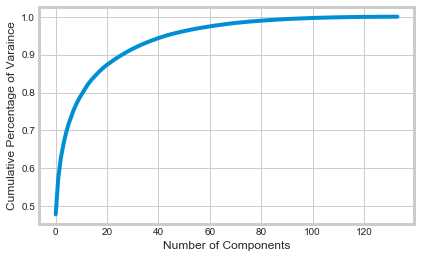

In [67]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Percentage of Varaince')

**The plot above shows that 134 principal components can explain all the variance, which is the number of total aisles. The first 40 principal components only capture 50% of the variance. However, because too many PCs will be too memory intensive, we will let's set our number of principal components to 10 which explains ~80% of the variance.**

In [68]:
num_pc = 10

### Step 6: Create a New Matrix Using the n Components

**We need to construct a project matrix to transform our data onto the new feature subspace. We transform our data by fitting it with the same number of dimensions as features, which in this case is 10.**

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=num_pc).fit(data)
pca10 = pca.transform(data)

In [116]:
print('The shape of the original dataset was {}.'.format(data.shape))
print('The shape of the transformed dataset was {}.'.format(pca10.shape))

The shape of the original dataset was (206209, 134).
The shape of the transformed dataset was (206209, 10).


In [78]:
col_names = ['PC ' + str(i) for i in range(1, num_pc+1)]
cust_seg = pd.DataFrame(pca10, columns=col_names)
cust_seg.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,-24.811636,3.449193,-1.611615,-0.470784,0.499460,-1.889403,2.687023,-3.662079,-2.663199,-1.397240
1,10.331587,39.529396,4.610970,14.683959,-7.375515,-2.020528,7.623149,4.111835,-9.993579,-12.401926
2,-9.247469,2.382711,-11.077053,0.846667,-0.395421,-2.786371,-6.674953,6.068744,-2.150279,-1.612084
3,-29.242883,-0.880035,-1.984256,2.315426,-0.296219,0.979968,0.805078,0.717978,0.037587,-0.867084
4,-19.186003,-3.037864,0.186761,3.651016,0.856534,-2.306496,-5.230103,2.246243,0.926095,3.349854


### Step 7: Visualizing Component Pairs

<Figure size 1440x1440 with 0 Axes>

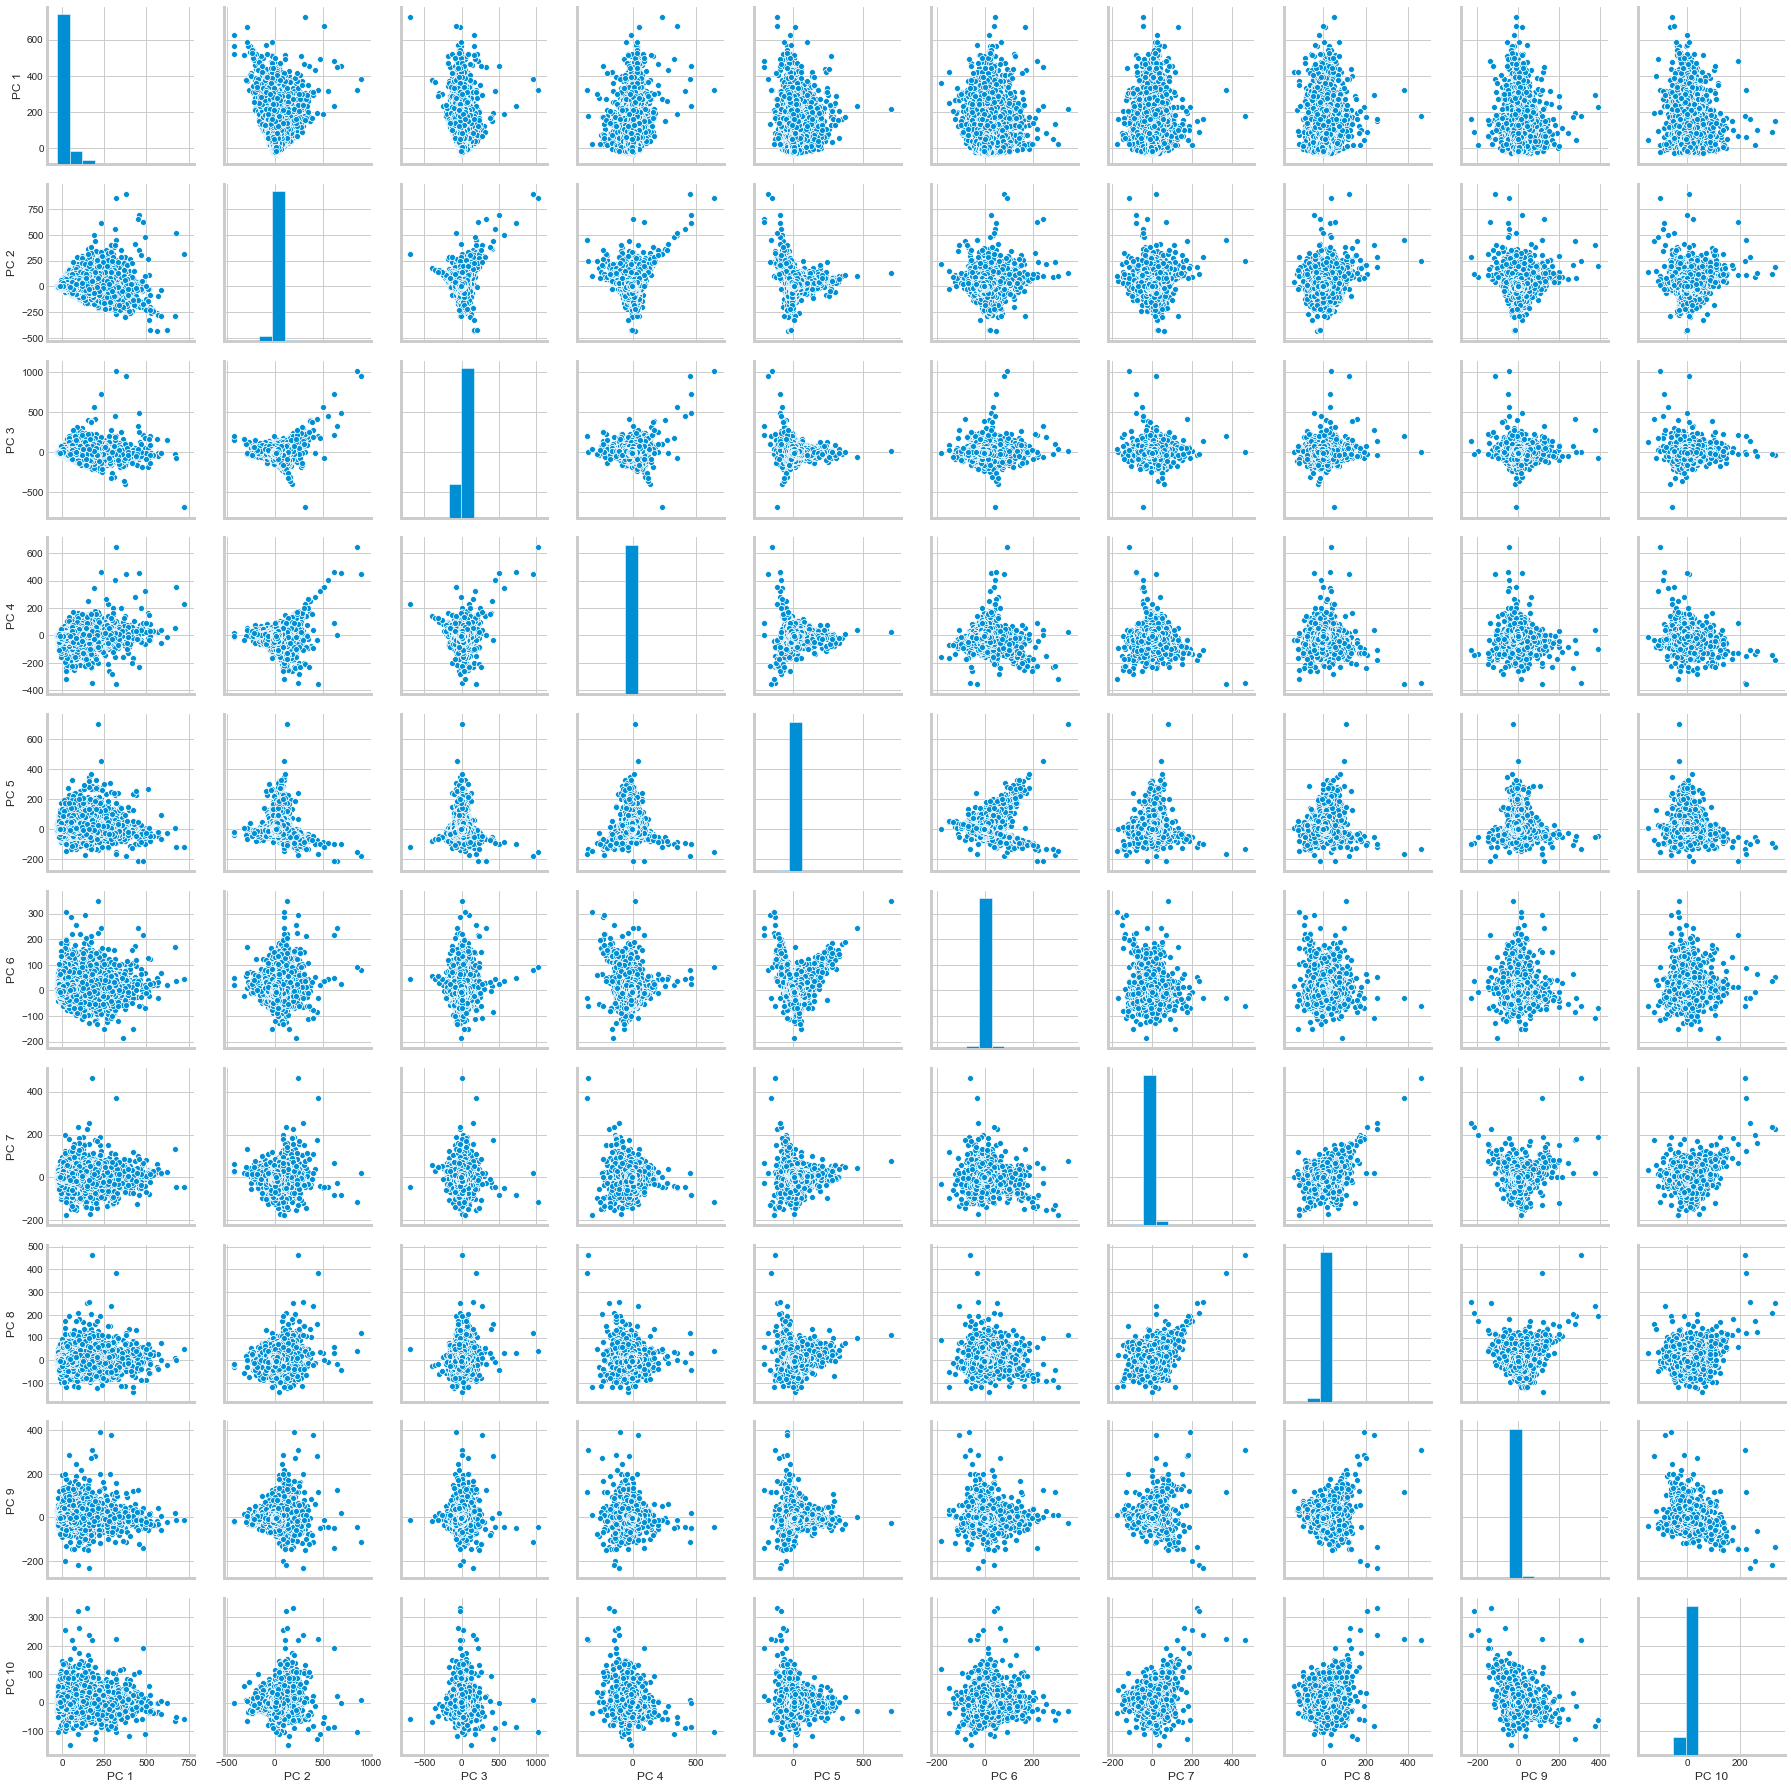

In [65]:
plt.figure(figsize=(20, 20))
sns.pairplot(cust_seg)

**Because there are 10 principal components and therefore 10 dimensions, we cannot visualize the clusters altogether. We are limited to only visualizing the different combination of component pairs in 2 dimensions. Let's look at the PC 2 and PC 5 pair.**

In [172]:
to_cluster = cust_seg[['PC 1', 'PC 10']]
to_cluster.head()

,PC 1,PC 10
0,-24.811636,-1.397240
1,10.331587,-12.401926
2,-9.247469,-1.612084
3,-29.242883,-0.867084
4,-19.186003,3.349854


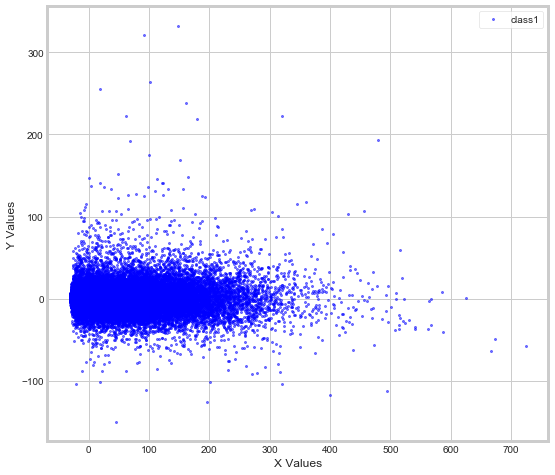

In [166]:
plt.figure(figsize=(8, 8))
plt.plot(to_cluster['PC 1'], to_cluster['PC 10'], 'o', markersize=2, color='blue', alpha=0.5, label='class1')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

### Step 8: Create Customer Segments

#### Approach 1: Gaussian Mixture Model (GMM)

**GMM does not assign points to clusters definitively and uses probability of a point to determine the feasibility of a point belonging to a cluster, so this algorithm is used when we are uncertain of which groups the data points belong to.**

**Advantages:**
1. Greater flexibility due to clusters having unconstrained covariances
2. Allows mixed memberships
3. Does not assume clusters to be of any shape and works well with non-linear geometric distributions
4. Does not bias the cluster sizes like K-Means does

**Disadvatanges:**
1. May converge to local optima depending on the initialization of clusters
2. Much more complicated to interpret
3. Uses all the components it has access to so initialization of clusters will be difficult when there is high dimensionality

In [106]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [167]:
def gmm(data, num_component):
    global clust, preds, centers
    clust = GaussianMixture(n_components=num_component, random_state=0)
    clust.fit(data)
    
    preds = clust.predict(data)
    centers = clust.means_
    score = silhouette_score(data, preds)
    results = [preds, centers, score]
    return(results)
    
df_gmm = pd.DataFrame()
for i in range(2, 6):
    temp = pd.DataFrame({'Number of Clusters': i, 'Silhouette Score': gmm(to_cluster, i)[2]}, index=[i])
    df_gmm = pd.concat([df_gmm, temp])
    
df_gmm

,Number of Clusters,Silhouette Score
2,2,0.584430
3,3,0.446147
4,4,0.391656
5,5,0.373793


**A Gaussian Mixture Model with 2 clusters yielded the best silhouette score of ~0.58.**

#### Approach 2: K-Means Clustering

**K-means, a special case of the GMM, minimizes the distance between points and the centroid within the same cluster by hard assigning points to a cluster, so this algorithm is used when we are certain about which groups the the data points belong to.**

**Advantages:**
1. Easy to interpret and implement
2. Works well in practice
3. Fairly fast to run
4. Better for high dimensional data

**Disadvatanges:**
1. May converge to a local optima depending on the initialization of clusters
2. May be computationally expensive to compute Euclidean distances (that can be overcome with batch K-means)
3. Susceptible to outliers (that can be overcome by preprocessing the data to exclude outliers)
4. Assumes the clusters are spherical and does not work efficiently with complex geometrical shaped data

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [168]:
def kmeans(data, num_cluster):
    clust = KMeans(n_clusters=num_cluster, random_state=0)
    clust.fit(data)
    
    preds = clust.predict(data)
    centers = clust.cluster_centers_
    score = silhouette_score(data, preds)
    results = [preds, centers, score]
    return(results)
    
df_kmeans = pd.DataFrame()
for i in range(2, 6):
    temp = pd.DataFrame({'Number of Clusters': i, 'Silhouette Score': kmeans(to_cluster, i)[2]}, index=[i])
    df_kmeans = pd.concat([df_kmeans, temp])
    
df_kmeans

,Number of Clusters,Silhouette Score
2,2,0.778184
3,3,0.695194
4,4,0.629748
5,5,0.588181


**A K-Means clustering with 2 clusters yielded the best silhouette score of ～0.78.**

**Since the silhouette scores is better for k-means, we'll use k-means clustering. However, although k-means with 2 clusters yields the highest silhouette score, we'll use 4 clusters because a lot of the products purchased are fresh fruits and vegetables, so a lot a high silhouette score for two clusters may not necessarily meaningful if those two clusters are whether a customer purchased fresh fruits and/or vegetables (segment 1) or not (segment 2).**

In [169]:
kmeans_clust = kmeans(to_cluster, num_cluster=4)
kmeans_preds = kmeans_clust[0]
kmeans_centers = kmeans_clust[1]

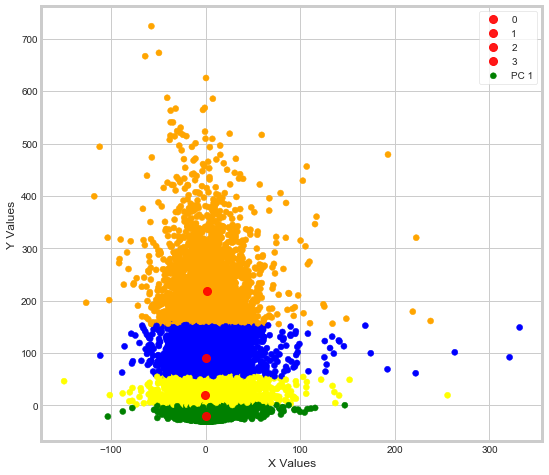

In [173]:
plt.figure(figsize=(8,8))
colors = ['yellow','orange','green','blue']
colored = [colors[c] for c in kmeans_preds]
plt.scatter(to_cluster['PC 10'], to_cluster['PC 1'], color=colored)
for ci, c in enumerate(kmeans_centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label='' + str(ci))

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

### Step 10: Data Recovery

**In a problem of creating customer segments, a cluster's centroid corresponds to the average customer of that segment. Since the data is reduced in dimension, we need to recover the representative customer spending from these data points by applying the inverse.**

In [183]:
clust_seg = data.copy()
clust_seg['cluster'] = kmeans_preds
clust_seg.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10,0,0,0,0,9,0,0,0,0,0,3,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2
2,0,3,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,13,0,0,0,0,5,0,11,0,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,9,40,0,0,0,0,2,0,0,0,19,0,0,0,4,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,12,0,0,0,1,0,0,0,4,0,1,0,0,5,0,1,0,0,3,0,0,1,0,11,0,0,2,0,0,0,5,0,0,0,0,0,0,0,3,2,0,0,0,0,3,1,1,0,0,0,0,2,0,42,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,5,0,0,0,0,14,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,4,1,0,0,0,0,0,2,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2
5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,1,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,2,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2


In [184]:
c0 = clust_seg[clust_seg['cluster']==0].drop('cluster', axis=1).mean()
c1 = clust_seg[clust_seg['cluster']==1].drop('cluster', axis=1).mean()
c2 = clust_seg[clust_seg['cluster']==2].drop('cluster', axis=1).mean()
c3 = clust_seg[clust_seg['cluster']==3].drop('cluster', axis=1).mean()

**At first glance, the proportion of products purchased seem to be roughly the same for Segments 0, 1, and 2. However, Segment 3 has entirely different purchasing patterns. To be specific, purchasing patterns in Segment 3 seems to mirror the almost exact opposite of that of the first three segments. For example, for Segment 3, "Fresh Fruits", "Fresh Vegetables", "Packaged Vegetables Fruits", and "Yogurt" have negative values.**

In [185]:
pca2 = PCA(n_components=2).fit(data)

true_centers = pca2.inverse_transform(kmeans_centers)
segments = ['Segment {}'.format(i) for i in range(0, len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
true_centers

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
Segment 0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,3.0,6.0,1.0,0.0,2.0,0.0,1.0,2.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,24.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,7.0,0.0,1.0,2.0,0.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,18.0
Segment 1,0.0,-1.0,0.0,0.0,20.0,1.0,-0.0,0.0,0.0,2.0,1.0,15.0,12.0,5.0,1.0,-1.0,2.0,1.0,15.0,4.0,-6.0,-3.0,-0.0,1.0,17.0,30.0,2.0,0.0,10.0,1.0,1.0,11.0,17.0,12.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0,2.0,34.0,5.0,0.0,0.0,0.0,0.0,1.0,10.0,81.0,-16.0,1.0,-129.0,5.0,0.0,8.0,0.0,0.0,12.0,2.0,4.0,2.0,0.0,9.0,-3.0,7.0,0.0,1.0,4.0,4.0,11.0,0.0,0.0,5.0,10.0,0.0,0.0,-0.0,2.0,12.0,-0.0,-1.0,34.0,1.0,1.0,0.0,0.0,8.0,-3.0,1.0,1.0,6.0,24.0,-0.0,-0.0,7.0,0.0,11.0,5.0,1.0,-0.0,2.0,8.0,-2.0,3.0,2.0,1.0,1.0,0.0,26.0,1.0,1.0,-0.0,0.0,0.0,1.0,13.0,-1.0,12.0,1.0,0.0,-4.0,0.0,9.0,16.0,-3.0,1.0,2.0,1.0,1.0,39.0,0.0,128.0
Segment 2,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,4.0,0.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,-0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,-0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,-0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-4.0
Segment 3,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,1.0,1.0,8.0,6.0,2.0,0.0,-0.0,1.0,1.0,7.0,2.0,-2.0,-0.0,0.0,1.0,8.0,15.0,1.0,0.0,5.0,0.0,1

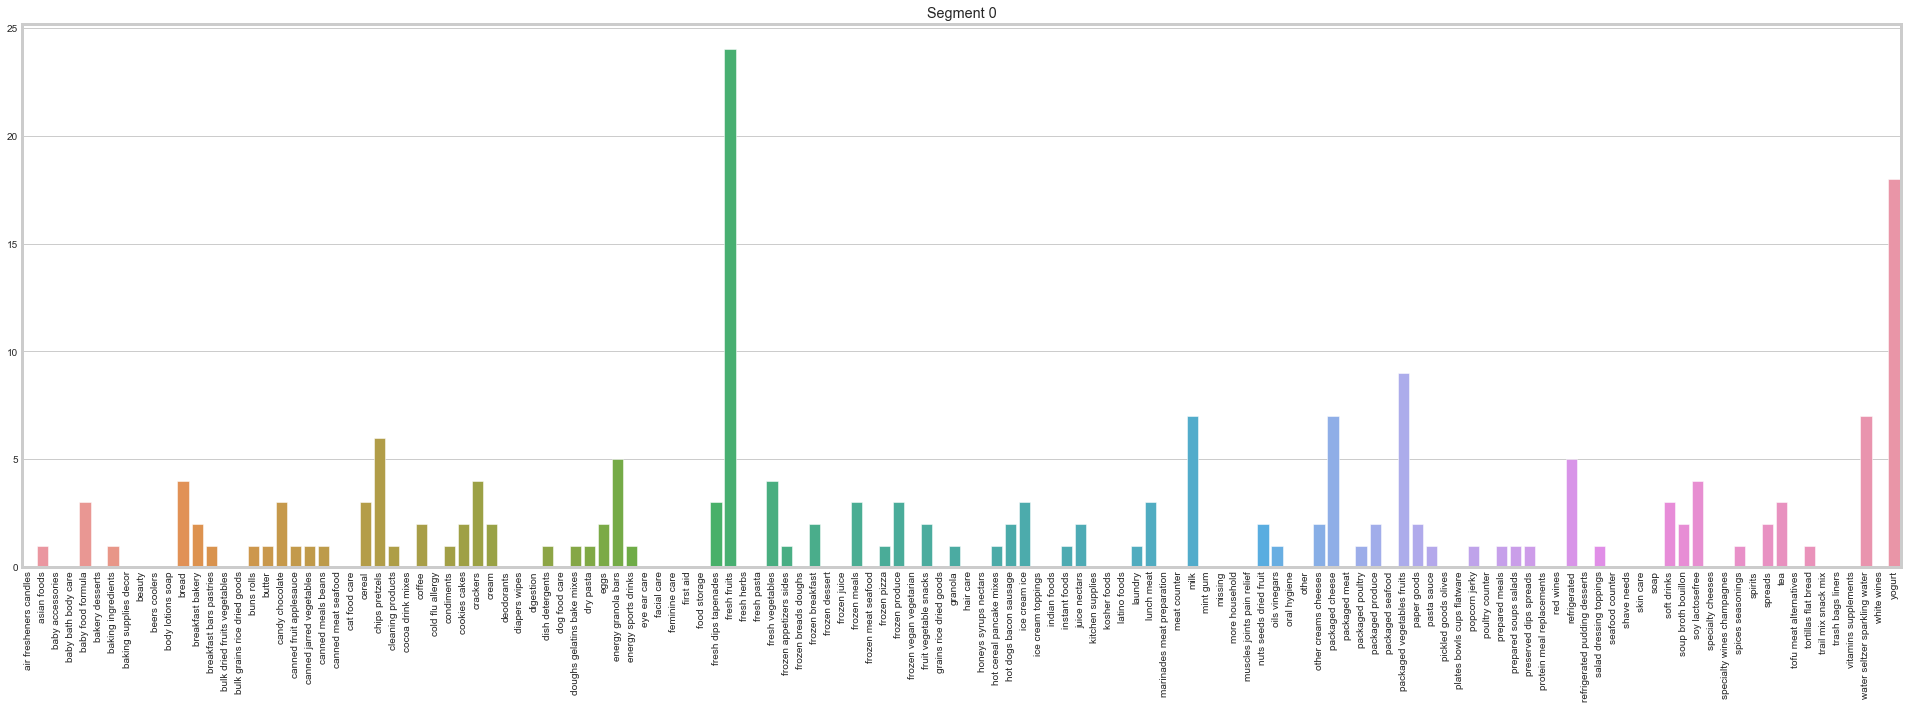

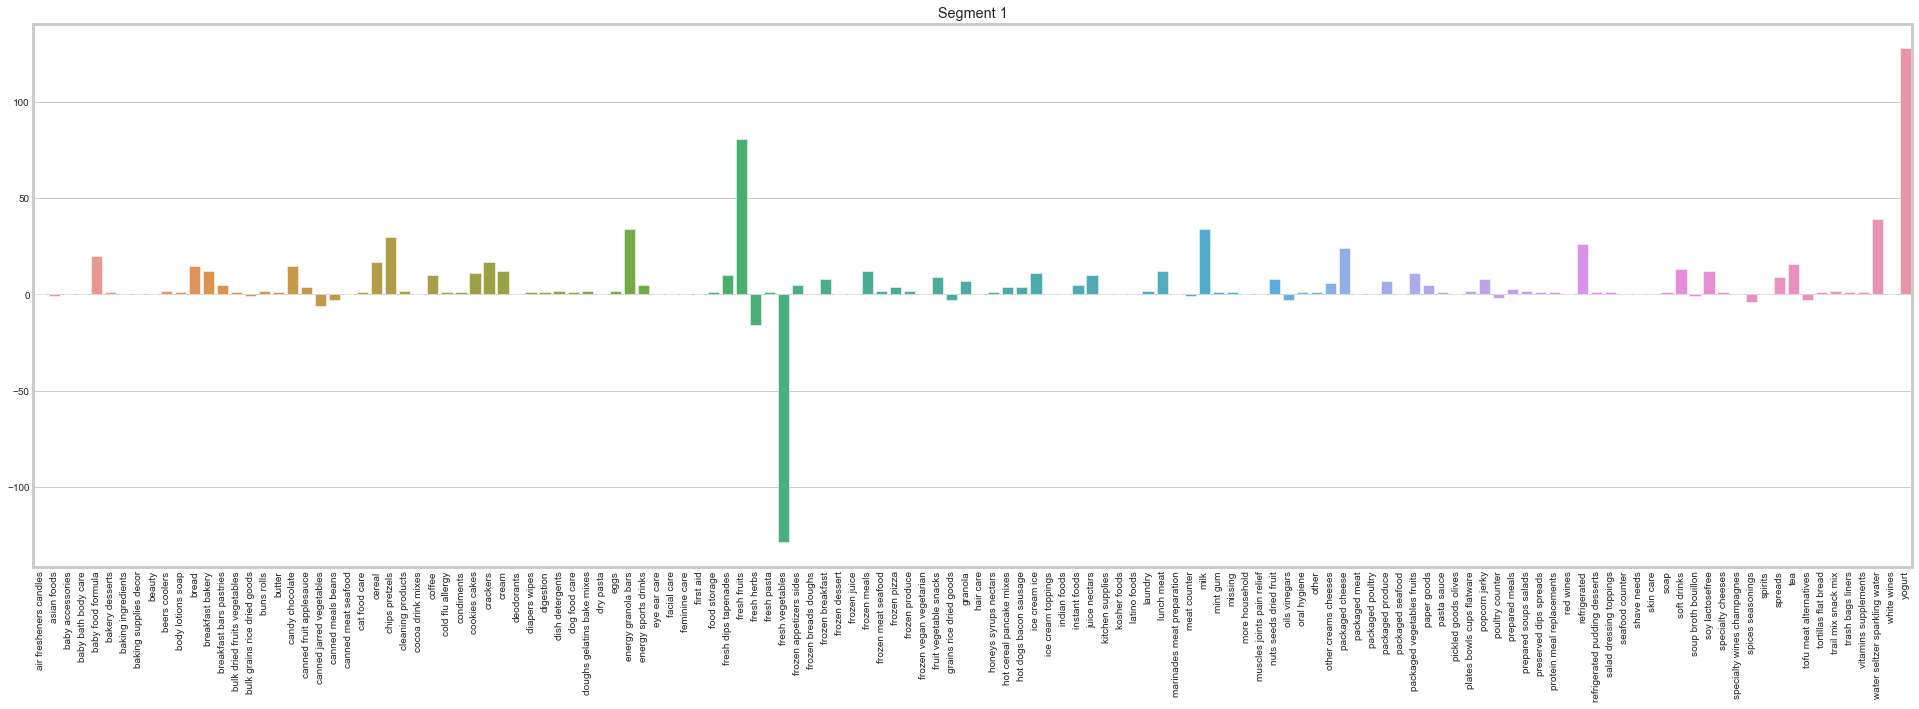

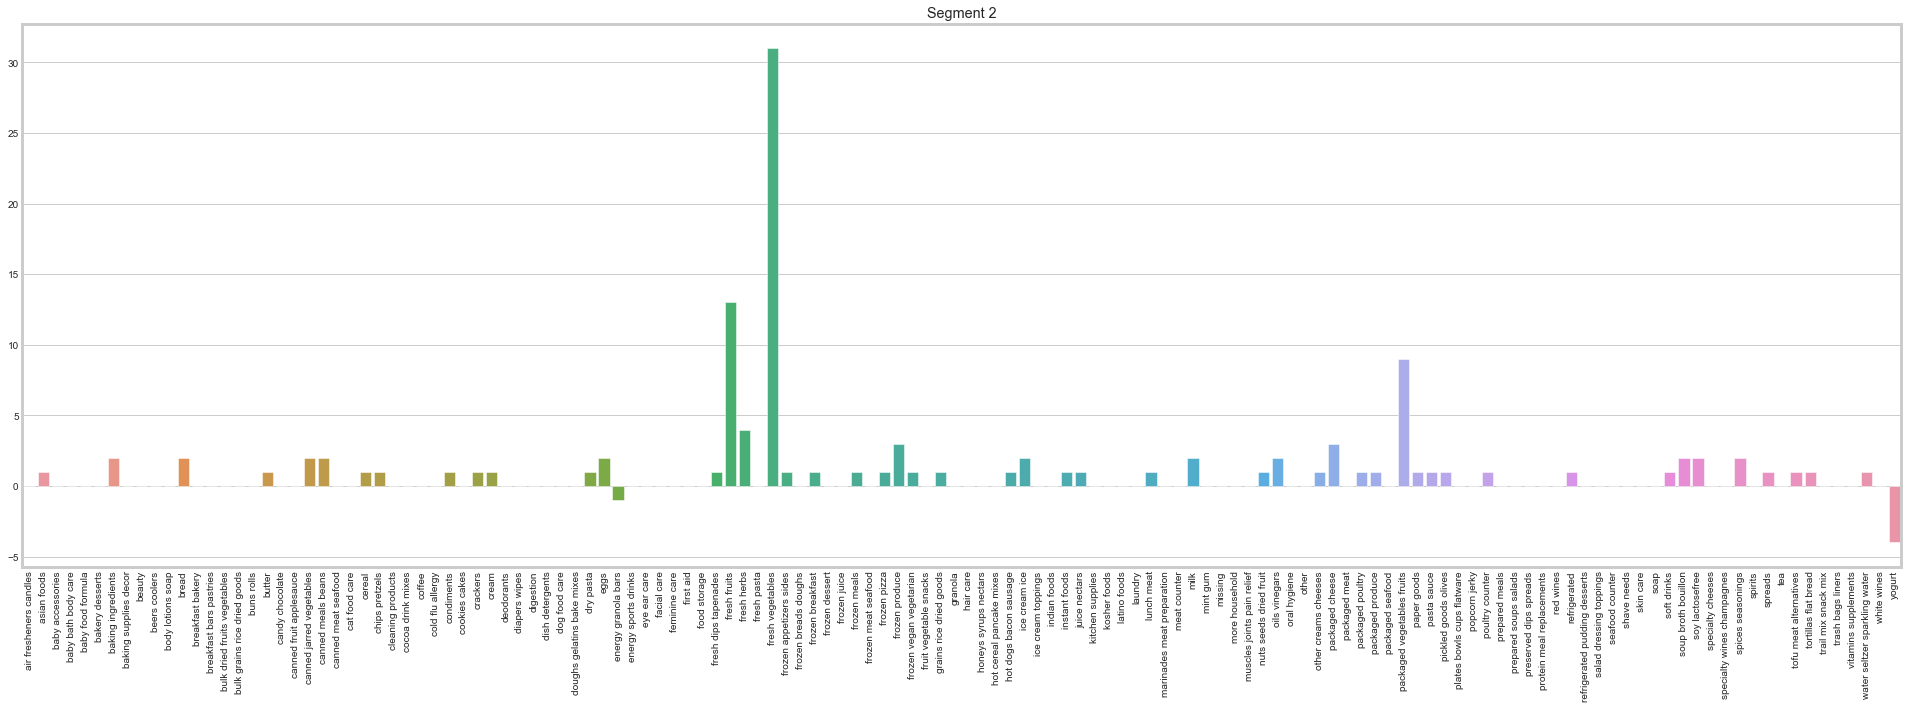

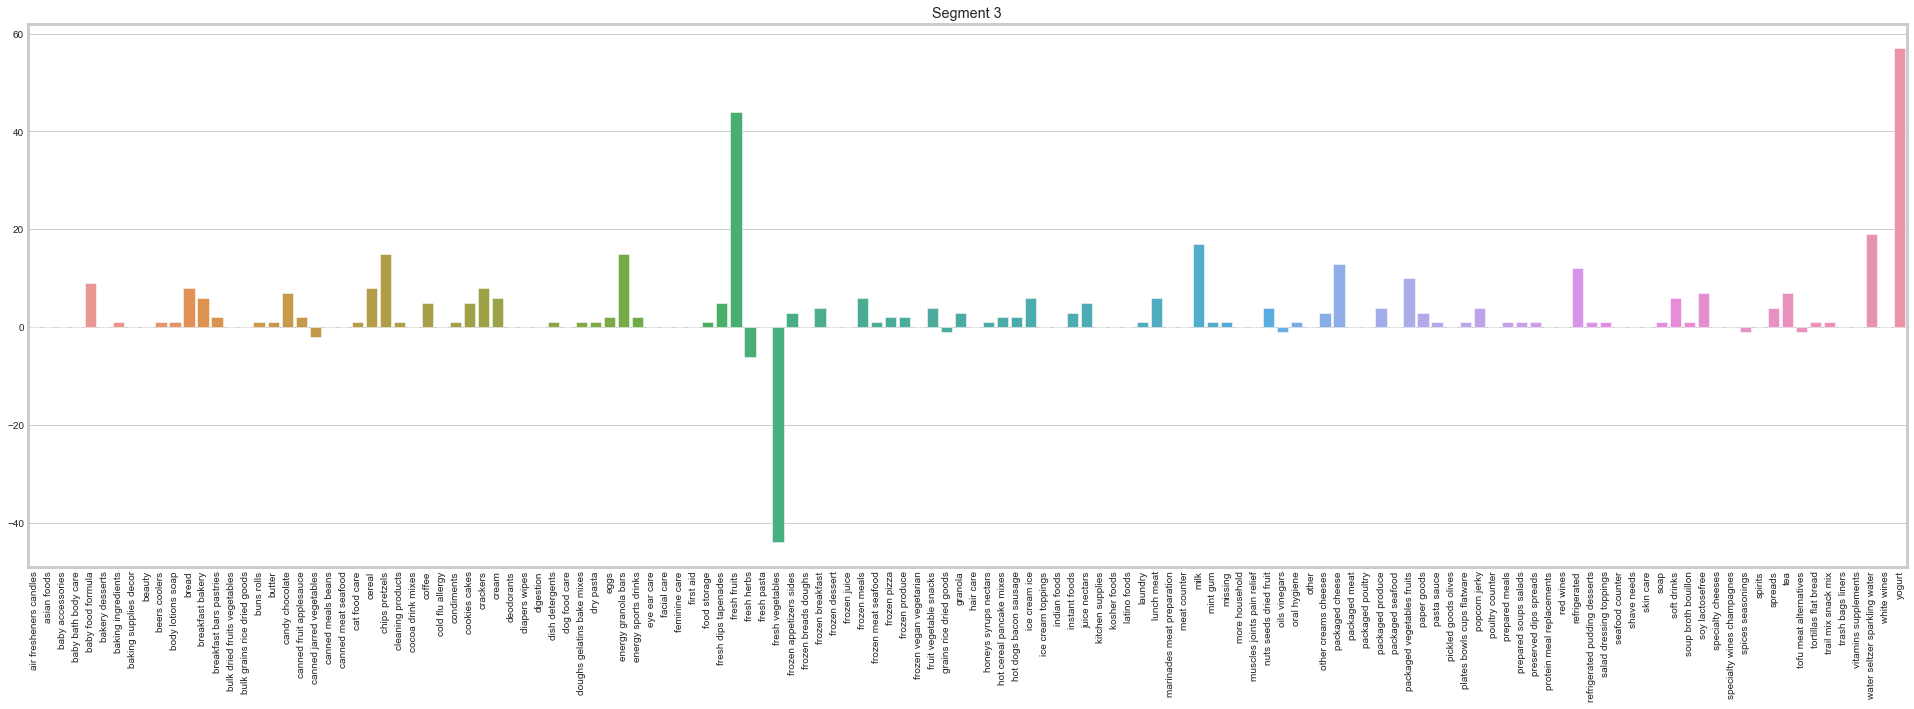

In [186]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.axes().set_title('Segment 0')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[0].values)

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.axes().set_title('Segment 1')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[1].values)

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.axes().set_title('Segment 2')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[2].values)

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.axes().set_title('Segment 3')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[3].values)

### Step 11: Top 10 Goods of Each Cluster

In [187]:
print('Top 10 Goods Purchased by Cluster 0')
c0.sort_values(ascending=False)[0:10]

Top 10 Goods Purchased by Cluster 0


aisle
fresh fruits                     29.875544
fresh vegetables                 28.863758
packaged vegetables fruits       14.780098
yogurt                           11.963510
packaged cheese                   8.001323
milk                              7.003079
water seltzer sparkling water     6.610973
chips pretzels                    5.817574
soy lactosefree                   5.351622
refrigerated                      4.690617
dtype: float64

In [188]:
print('Top 10 Goods Purchased by Cluster 1')
c1.sort_values(ascending=False)[0:10]

Top 10 Goods Purchased by Cluster 1


aisle
fresh fruits                  157.773934
fresh vegetables              150.040225
packaged vegetables fruits     67.468490
yogurt                         55.122285
packaged cheese                32.053097
milk                           30.643604
soy lactosefree                19.913113
baby food formula              19.193886
bread                          18.651649
chips pretzels                 18.420488
dtype: float64

In [189]:
print('Top 10 Goods Purchased by Cluster 2')
c2.sort_values(ascending=False)[0:10]

Top 10 Goods Purchased by Cluster 2


aisle
fresh fruits                     6.136985
fresh vegetables                 5.552196
packaged vegetables fruits       3.357364
yogurt                           2.779096
water seltzer sparkling water    2.486821
packaged cheese                  2.205358
milk                             1.950553
chips pretzels                   1.945743
ice cream ice                    1.507872
soft drinks                      1.438395
dtype: float64

In [190]:
print('Top 10 Goods Purchased by Cluster 3')
c3.sort_values(ascending=False)[0:10]

Top 10 Goods Purchased by Cluster 3


aisle
fresh fruits                     75.155834
fresh vegetables                 70.391461
packaged vegetables fruits       34.335811
yogurt                           28.090413
packaged cheese                  17.387992
milk                             16.421835
water seltzer sparkling water    12.308553
soy lactosefree                  11.541985
chips pretzels                   11.157816
bread                            10.278675
dtype: float64

**The goods:**
1. fresh fruits
2. fresh vegetables
3. packaged vegetables fruits
4. yogurt
5. packaged cheese
6. milk
7. chips pretzels

**are bought the most by the customers of all four segments. Water seltzer sparkling water, soy lactosefree, and bread are the other popular products but not bought by all four customer segments.**

**Different clusters may purchase these goods in different quantities and proportions, so we will look deeper into it.**

In [203]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'], c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'], c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'], c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'], c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk', 'chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,chips pretzels
0,29.875544,28.863758,14.780098,11.963510,8.001323,7.003079,5.817574
1,157.773934,150.040225,67.468490,55.122285,32.053097,30.643604,18.420488
2,6.136985,5.552196,3.357364,2.779096,2.205358,1.950553,1.945743
3,75.155834,70.391461,34.335811,28.090413,17.387992,16.421835,11.157816


In [204]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,chips pretzels
0,28.103642,27.151864,13.903498,11.253961,7.526769,6.587730,5.472537
1,30.844010,29.332109,13.189750,10.776129,6.266219,5.990670,3.601113
2,25.648469,23.204446,14.031525,11.614751,9.216912,8.151999,8.131898
3,29.712773,27.829184,13.574624,11.105513,6.874323,6.492354,4.411230


**Customers of cluster 2 proportionally buy less fruits and vegetables and more packaged cheese, milk, and chips and pretzels than the customers of the other three clusters. Customers of cluster 1 proportionally buy the most fresh fruits and vegetables and the least dairy and chips and pretzels out of all the other customer segments.**

### Step 12: Next 10 Most Bought Products for Each Cluster

**Let's look at more specific and less generic products that are not bought by just everyone.**

In [206]:
print('Next Top 15 Goods Purchased by Cluster 0')
c0.sort_values(ascending=False)[10:25]

Next Top 10 Goods Purchased by Cluster 0


aisle
bread                   4.665793
frozen produce          4.439829
ice cream ice           3.989777
eggs                    3.803190
energy granola bars     3.747841
crackers                3.614509
lunch meat              3.226108
fresh herbs             3.185433
frozen meals            3.082289
cereal                  2.979121
fresh dips tapenades    2.937219
baby food formula       2.895389
soup broth bouillon     2.875785
juice nectars           2.648017
baking ingredients      2.566834
dtype: float64

In [207]:
print('Next Top 15 Goods Purchased by Cluster 1')
c1.sort_values(ascending=False)[10:25]

Next Top 10 Goods Purchased by Cluster 1


aisle
water seltzer sparkling water    17.281577
refrigerated                     16.429606
frozen produce                   16.130330
fresh herbs                      15.969161
energy granola bars              14.203272
crackers                         13.315902
eggs                             12.677125
lunch meat                       12.226602
fresh dips tapenades             10.819254
nuts seeds dried fruit           10.520247
ice cream ice                     9.962188
cereal                            9.509252
baking ingredients                9.491285
canned jarred vegetables          9.335479
other creams cheeses              9.063824
dtype: float64

In [208]:
print('Next Top 15 Goods Purchased by Cluster 2')
c2.sort_values(ascending=False)[10:25]

Next Top 10 Goods Purchased by Cluster 0


aisle
refrigerated           1.423251
soy lactosefree        1.394814
bread                  1.360989
frozen meals           1.304259
crackers               1.171920
frozen produce         1.156033
packaged produce       1.077536
cereal                 1.056921
eggs                   1.052547
energy granola bars    1.019437
juice nectars          0.932192
lunch meat             0.915501
soup broth bouillon    0.906386
paper goods            0.877268
candy chocolate        0.863295
dtype: float64

In [209]:
print('Next Top 15 Goods Purchased by Cluster 3')
c3.sort_values(ascending=False)[10:25]

Next Top 10 Goods Purchased by Cluster 0


aisle
refrigerated                9.482512
frozen produce              9.253328
baby food formula           8.490300
energy granola bars         8.172331
eggs                        7.938969
fresh herbs                 7.835528
crackers                    7.539720
lunch meat                  6.938190
ice cream ice               6.850396
fresh dips tapenades        6.206174
cereal                      5.617247
soup broth bouillon         5.398471
cream                       5.359884
baking ingredients          5.350892
canned jarred vegetables    5.261611
dtype: float64

## Conclusion/Findings

**As predicted, when we look at the products after the first 10 most popular products, there is more differentiation between the products bought by the four customer segments.**

**For example, clusters 0 and 3 purchase baby food formula fairly often, which clusters 1 and 2 do not purchase. This might shed some insight on the family status of clusters 0 and 3.**

**Cluster 2 is the only customer segment that does not include "fresh herbs" and "baking ingredients" but includes a lot of processed foods which may imply that this customer segment may consist of a lot of working people who do not have time to cook/bake.**

**Cluster 3 purchases include both "baby food formula" and "energy granola bars", "lunch meat", and "cereal" which might represent families with a newborn/toddler in addition to one or more children already. Although cluster 0 always shares the aforementioned set of products, "baby food formula" is purchased at a lower proportion, hence customers of this cluster may have a toddler who still eats but does not rely on baby food formula.**

**Although the lines between what differentiates between customers of, for example, segment 0 and segment 1 are not solid and specific like families with babies vs restaurants vs college students, this customer segmentation using PCA and K-means still provides a lot of valuable insight into Instacart's customer purchasing behavior.**

## Recommendations

**With this in mind, a company could run A/B tests on a subset of data points close to their cluster centers to act as representative of their respective clusters, reduce the prices on half of the points in the subsets for each cluster, and see how those customers react in comparison to the other customers in the same cluster who still have the old prices. Based on this, company can predict how all customers in each cluster would react to the change in prices.**

**The company could also train a supervised machine learning classification algorithm (e.g. SVC, or decision tree classifier, etc) with the initial dataset's customer product spending as inputs and the customer segments (engineered feature as obtained from K-means clustering) as the target variable. The classifier could then be used to predict the customer segment for new customers which would then determine the most appropriate prices and target advertisements/promotions.**

**By understanding the population of the customer segments and the relationships between the products customers purchase in each cluster, a company can also tap into driving sales of related products. For customers that are in clusters purchasing baby food formula more often than other clusters, Instacart can recommend obviously related items such as accessories, paper towels for messes and cleanups, and diapers and less obviously related items such as beer (there are findings showing that there are associations between purchasing diapers and purchasing beer in the same transaction) which require a market basket analysis and association analysis to uncover (see the "instacart_market_basket_analysis" notebook).**